In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Overview

Newton's method (aka. Newton-Raphson) of optimization is an iterative method for finding the roots of a differentiable function $F$. The function $F$ must be twice differentiable because the approach relies on calculation second derivatives as well as first derivatives. The solutions may be minima, maxima, or ***Saddle Points***.

The general approach is to construct a sequence $x_k$ from an initial guess, a starting point $x_0$. The sequence will converge towards a *minimizer* $x_*$ of $f$ by using a sequence of *second-order Taylor approximations* of $f$. The second-order Taylor expansion of $f$ around $x_k$ is: $$f(x_k + t) \approx f(x_k) + f'(x_k)t + \frac{1}{2}f''(x_k)t^2$$

When  $f''(x_k)$ is positive, then this approximation is a **convex** function of $t$ and its minimum can be found by setting its derivative to 0:
$$0 = \frac{d}{dt}\left( f(x_k) + f'(x_k)t + \frac{1}{2}f''(x_k)t^2 \right) = f'(x_k) + f''(x_k)t$$

This minimum is achieved at: $$ t = -\frac{f'(x_k)}{f''(x_k)}$$

Then, the iterate $x_{k+1}$ is defined as: $$ x_{k+1} = x_k + t = x_k - \frac{f'(x_k)}{f''(x_k)}$$

### Taylor Series - Taylor Approximations

Basic principal is to take *non-polynomial* functions and approximate them with polynomials at some value of their input domain (say $x$). To make this approximation, we need to match some basic features of the original function at the point of interest.
1. The value of the approximation must equal the value of the original function
    - i.e., if the original function has y=1 at x=0 then the approximation at x=0 must also have y=1
2. The approximation must share a tangent line with the original function at the point of approximation
    - i.e., the approximation and the original function must have the same slope at the point of approximation
    - So, the approximation must match the *first derivative* of the original function at the point of approximation
3. The curvature of the approximation must match that of the original function at the point of approximation
    - The approximation must match the *second derivative* of the original function at the point of approximation
    

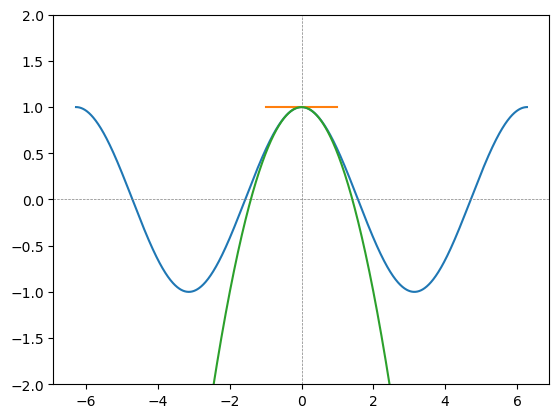

In [19]:
# plot cosine wave
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.cos(x)
plt.plot(x, y)
plt.ylim([-2.0, 2.0])
plt.axhline(y=0, color='gray', linewidth=0.5, linestyle='dashed')
plt.axvline(x=0, color='gray', linewidth=0.5, linestyle='dashed')

# fit approximation at origin
def approx(c0,c1,c2,x): 
    poly =  c0 + c1*x + c2*x**2    # polynomial approx
    d_poly = c1 + 2*c2*x           # first derivative
    d2_poly = 2*c2                 # second derivative
    return poly

#feature 1: match value at x=0
c0 = 1

# feature 2: match tangent line at x=0
plt.plot([-1,1], [1,1])    
c1 = 0         # d/dx[cos(x)] = -sin(x); -sin(0) = 0

# feaure 3: match curvature at x=0
c2 = -(1/2)    # d^2/dx^2[cos(x)] = -cos(x); -cos(0) = -1

poly = approx(c0, c1, c2, x)
plt.plot(x, poly)

plt.show();

So, we've closely approximated the function $cos(x)$ at $x=0$ using a second order polynomial of the form $c_0 + c_1x + c_2x^2$. Each $c_i$ coefficient was chosen to match the $i^{th}$ derivative of the original function. We can continue to improve the approximation by adding more terms to the polynomial, each matching a higher order derivative. For each new derivative, the selection of the corresponding coefficient will take the form: $$c=\frac{1}{d!}$$
where $d$ is the value of the derivative evaluated at the point of approximation (e.g. $x=0$).

**Note:** The Taylor's series approximation used in the Newton optimization method only finds uses the second order polynomial approximation.

Now, to shift the approximation away from the origin by some amount $a$ (s.t. $x=a$), we can simply compute the approximation using polynomial terms of $(x-a)$ instead of $x$:
$$ P(x) = f(a) + \frac{df(a)}{dx}\frac{(x-a)^1}{1!} + \frac{d^2f(a)}{dx^2}\frac{(x-a)^2}{2!} + ...$$

So, this is great - but what about Newton optimization? Basically, in Newton's optimization method, we iterate over the function using second order Taylor approximations to find minima. By fitting a second order Taylor approximation to the function and finding the minimum *of the approximation* (i.e. $t$) we can find a point that is closer to the minimum of the function. If the function is convex that is (i.e. $f''(x) > 0$). We then move the approximation point over to the location of this approximated minimum on the original function (i.e. $x_k + t$) and repeat the process: approximate with a second order Taylor polynomial, find its minimum, iterate the input $x_k$ by the minimum. For a convex function of $x$, this process will find a minimum of the function - but it may not be the *global minimum*.

# Multivariate Extension

## General Idea

Start at some initial point $x_0$. Then:
1. Compute the ascent/descent direction (for maximization/minimization): $\vec{d}_0$
2. Step towards that direction: $x_1 = x_0 + h\vec{d}_0$
3. Repeat steps 1 & 2 until convergence: $\|x_{i+1} - x_i\| \le \epsilon$

Our general intuition for a maximization problem would be to step in the direction of the gradient of the function, $\nabla f$, evaluated at the point $x_i$ when we're at $x_i$. This is because the gradient points in the direction of greatest *increase* in the function. Then for minimization we would simply step in the $-\nabla f$ direction. This is the intuition underlying ***gradient ascent/descent***.

So, the gradient may be a natural choice for the step direction, $\vec{d}_i$, but **how should we choose the step size** $h$?

One approach is ***Line Minimization:*** find $h$ s.t. the value of $f$ evaluated at $x_1 = x_0 + h\vec{d}_0$ is minimized. $$h^* = \arg\min_hf(x_0+h\vec{d}_0)$$

If we denote $g(h)=f(x_0+h\vec{d}_0)$ then the line minimization value of $h^*$ is the roots of $g(h)$. Wherein $x_0$ and $\vec{d}_0$ are taken as given (treated as constants). So, we can find $h^*$ s.t. $g'(h^*) = 0$

Another approach is to simply choose some small number for $h$.

## Hessian Matrix

Let: $$f: \mathbb{R}^n \rightarrow \mathbb{R} \\ \vec{x} \in \mathbb{R}^n, f(x) \in \mathbb{R}$$


$$H[f(x)]_{ij} = \frac{\partial^2f(x)}{\partial x_i \partial x_j}$$

Note that the Hessian matrix is a symmetric matrix wherein the diagonal elements are all *n*-degree patrial derivatives w.r.t. one single variable. E.g., the rank 2 Hessian of $f(x,y)$: $$H[f(x,y)] = \begin{bmatrix} f_{xx} & f_{xy} \\ f_{yx} & f_{yy} \end{bmatrix}$$

The Hessian may also be written as the Jacobian of the gradient of the function: $$H[f(x)] = J[\nabla f(x)]$$

Recall that the gradient of $f$, $\nabla f$, is the vector of firstpartial derivatives w.r.t. each independent variable in $f$. As such:
$$f: \mathbb{R}^n \rightarrow \mathbb{R} \\ \nabla f: \mathbb{R}^n \rightarrow \mathbb{R}^n$$

### Jacobian

Suppose we have a function that maps: $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$, where $m \ne 1$. For such a function, how can we think about its derivatives? 

***Jacobian*** is the matrix representing the best linear map approximation of $f$ near a point (such as $(a,b)$). Although $f$ may not be a linear function, at a small enough scale, the mapping of points around $(a,b)$ appears linear. This is similar to the linear approximation interpretation of ordinary derivatives. 

**Aside:** Recall that matrixes are linear mappings (linear transformations). So the Jacobian matrix is a linear mapping.

Recall that a matrix can be understood as a collection of column vectors, each applying a linear transformation. The columns of the Jacobian matrix similarly each apply linear transformations to the inputs of the function $f$. E.g.:
$$f(x,y) = (x^2-y^2, 3xy) = (f_1(x,y), f_2(x,y)) \\$$
$$J[f(x,y)] =
\begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix}$$

The first column is a linear transformation in the $x$ direction and the second is a linear transformation in the $y$ direction.

### Hessian with Jacobian

$$H[f(x)] = J[\nabla f(x)]$$
Let:
$$\nabla f(x,y) = \begin{bmatrix} f_x \\ f_y \end{bmatrix} \\$$
$$J[\nabla f(x,y)] = \begin{bmatrix} f_{xx} & f_{xy} \\ f_{yx} & f_{yy} \end{bmatrix} $$


## Optimization with Hessian

Let the independent variables be expressed by the vector $\vec{x}$. If for **all** $\vec{x}$:
- $\vec{x}^TH\vec{x} > 0$; $H$ is ***positive definite***; the point evaluated is a local minimum

- $\vec{x}^TH\vec{x} < 0$; $H$ is ***negative definite***; the point evaluated is a local maximum

**Multivariate Taylor Series:**

$$f(\vec{x} + \vec{h}) = f(\vec{x}) + \vec{h}^T\nabla f(\vec{x}) + \frac{1}{2}\vec{h}^TH_f(\vec{x})\vec{h}+...$$

In Newton-Raphson optimization we are only interested in the terms up to the second-order (those explicitly give above). This is a quadratic function:
$$g(\vec{h}) = f(\vec{x}) + \vec{h}^T\nabla f(\vec{x}) + \frac{1}{2}\vec{h}^TH_f(\vec{x})\vec{h} \\$$
$$ \nabla g(\vec{h}) = \nabla f(\vec{x}) + H_f(\vec{x})\vec{h} = 0 $$
$$ \vec{h} = -H_f^{-1} (\vec{x}) \nabla f(\vec{x}) $$

Starting from some initial guess, $\vec{x}_0$, we optimize by iterating: $$\vec{x}_1 = \vec{x}_0 + \vec{h} = \vec{x}_0 - H_f^{-1}(\vec{x}_0)\nabla f(\vec{x}_0)$$

### Example:

$$f(x,y) = xy + 4y - 3x^2 - y^2 \\ f_0 = [1, -1]$$

$$ \nabla f(x,y) = \begin{bmatrix} y-6x \\ x + 4 - 2y \end{bmatrix} $$

$$ H[f(x,y)] = 
\begin{bmatrix}
-6 & 1 \\
1 & -2
\end{bmatrix}
$$

In [14]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
f_0 = np.array([1, -1])

In [26]:
def f(f_i):
    x, y = f_i[0], f_i[1]
    return x*y + 4*y - 3*x**2 - y**2

In [13]:
def grad(f_i):
    x, y = f_i[0], f_i[1]
    return np.array([y - 6*x, x + 4 - 2*y])

In [18]:
H = np.array([[-6, 1], [1, -2]])
H_inv = np.linalg.inv(H)

In [24]:
# note that this will overflow if there is no maximum
def maxFind(f_i):
    while f_i.any():
        res = f_i
        f_i = f_i - H_inv @ grad(f_i)
        if f(f_i) < f(res):
            return res

In [27]:
maxFind(f_0)

array([0.36363636, 2.18181818])